# Problem Statement: 
Build a deep neural network model that can classify traffic
signs present in the image into different categories.
There are different types of traffic signs like speed limits, no entry, traffic signals,
turn left or right, children crossing, no passing of heavy vehicles, etc. Traffic signs
classification is the process of identifying which class a traffic sign belongs to.
Dataset for this task is available at Kaggle. Download the dataset from Kaggle.
https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
#Directories of train and test set
train_dir=r'D:\deeplearning\archive\Train'
test_dir=r'D:\deeplearning\archive\Test'
validation_dir=r'D:\deeplearning\archive\Validation'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")
validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

Found 36920 images belonging to 43 classes.
Found 2360 images belonging to 43 classes.


In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
#Convolution and Maxpooling layers for feature extraction
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
#Densely connected network
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(43, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [16]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model_inception-{epoch:02d}.h5")

In [18]:
history=model.fit(train_generator,steps_per_epoch=1846,
                           epochs=30,
                           validation_data=validation_generator,
                           validation_steps=118,
                           callbacks=[checkpoint_cb])

Epoch 1/30
1846/1846 [==============================] - 19s 10ms/step - loss: 1.9302 - acc: 0.4566 - val_loss: 0.7793 - val_acc: 0.7623
Epoch 2/30
1846/1846 [==============================] - 19s 10ms/step - loss: 0.3835 - acc: 0.8844 - val_loss: 0.2315 - val_acc: 0.9356
Epoch 3/30
1846/1846 [==============================] - 19s 10ms/step - loss: 0.1630 - acc: 0.9537 - val_loss: 0.1649 - val_acc: 0.9538
Epoch 4/30
1846/1846 [==============================] - 19s 10ms/step - loss: 0.0954 - acc: 0.9731 - val_loss: 0.1507 - val_acc: 0.9572
Epoch 5/30
1846/1846 [==============================] - 19s 10ms/step - loss: 0.0630 - acc: 0.9822 - val_loss: 0.1158 - val_acc: 0.9691
Epoch 6/30
1846/1846 [==============================] - 19s 10ms/step - loss: 0.0403 - acc: 0.9879 - val_loss: 0.0983 - val_acc: 0.9831ss: 0.0404 - a - ETA: 1s - loss: 0.
Epoch 7/30
1846/1846 [==============================] - 19s 10ms/step - loss: 0.0341 - acc: 0.9905 - val_loss: 0.1039 - val_acc: 0.9742
Epoch 8/30
18

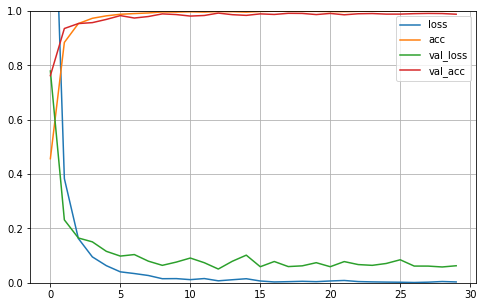

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical")

Found 2320 images belonging to 43 classes.


In [21]:
model.evaluate_generator(test_generator,steps=50)

c:\users\alex1121\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.04769895598292351, 0.9890000224113464]